<a href="https://colab.research.google.com/github/akashjain04/Prediction-of-Heart-Disease-using-SVM/blob/master/Predict_Heart_disease_using_SVM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

--2020-03-30 05:26:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18461 (18K) [application/x-httpd-php]
Saving to: ‘processed.cleveland.data’

processed.cleveland 100%[===================>]  18.03K  --.-KB/s    in 0.06s   

2020-03-30 05:26:57 (290 KB/s) - ‘processed.cleveland.data’ saved [18461/18461]



In [3]:
#Import the data
df = pd.read_csv('processed.cleveland.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
#Give names to column header
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalch','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
#Identify missing data
df.dtypes


age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalch     float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [6]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [9]:
#To count number of rows with ? 
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])


6

In [10]:
#To look at those rows with ?
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]


,age,sex,cp,restbp,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [11]:
len(df)

303

In [12]:
#Construct dataframe without those rows
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
len(df_no_missing)

297

In [13]:
df_no_missing['ca'].unique()
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [14]:
#Format the data
#Split data into dependent and independent variables
X = df_no_missing.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [15]:
Y =df_no_missing['hd'].copy()
Y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [16]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalch     float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [17]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [18]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [19]:
x_encoded = pd.get_dummies(X, columns=['cp','restecg','slope','thal'])
x_encoded.head()

,age,sex,restbp,chol,fbs,thalch,exang,oldpeak,ca,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,0,0,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,0,1,1,0,0,1,0,0


In [20]:
Y.unique()

array([0, 2, 1, 3, 4])

In [21]:
y_not_zero_idx = Y > 0
Y[y_not_zero_idx] = 1
Y.unique()

array([0, 1])

In [0]:
#Centering and scaling
#Creating testing and training 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [23]:
#Build a Preliminary SVM
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled,Y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

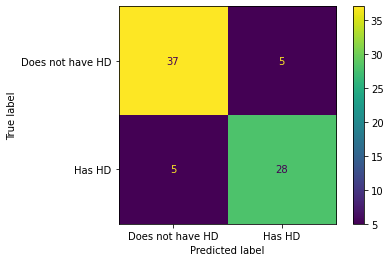

In [24]:
#Draw a confusion matrix
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      Y_test,
                      display_labels = ["Does not have HD","Has HD"])

In [26]:
#Optimize the SVM with cross validation
param_grid = [{
    'C': [1.0,10.0,100.0,1000.0],
    'gamma': [0.001,0.0001],
    'kernel': ['rbf']
},]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    verbose = 0
)
optimal_params.fit(X_train_scaled,Y_train)
optimal_params.best_params_


{'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'}

In [28]:
#Building Final Support Vector machine
clf_svm = SVC(random_state=42, C=10, gamma=0.001)
clf_svm.fit(X_train_scaled, Y_train) 

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

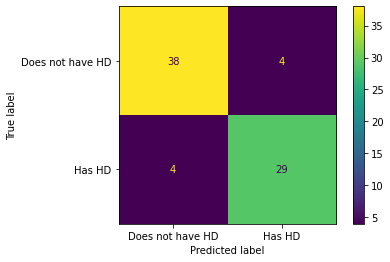

In [29]:
#Draw a confusion matrix
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      Y_test,
                      display_labels = ["Does not have HD","Has HD"])

In [30]:
len(df.columns)

14

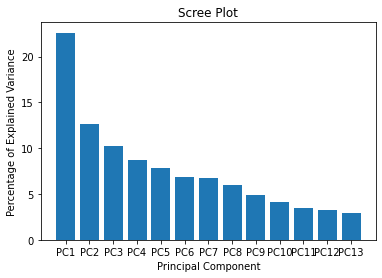

In [31]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title("Scree Plot")
plt.show()

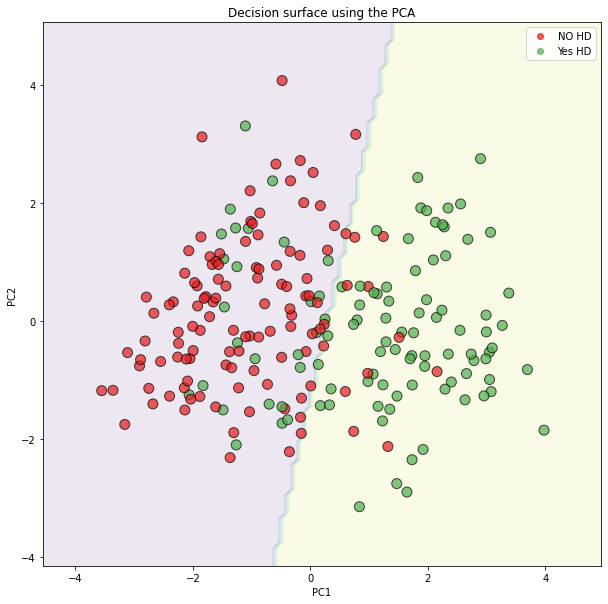

In [35]:
pc1 = X_train_pca[:, 0]
pc2 = X_train_pca[:, 1]
clf_svm.fit(np.column_stack((pc1,pc2)), Y_train)
x_min = pc1.min() - 1
x_max = pc1.max() + 1
y_min = pc2.min() - 1
y_max = pc2.max() + 1
xx , yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                                np.arange(start=y_min, stop=y_max, step=0.1))
z = clf_svm.predict(np.column_stack((xx.ravel(),yy.ravel())))
z = z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx, yy, z,alpha=0.1)
cmap = colors.ListedColormap(['#e41a1c','#4daf4a'])
scatter = ax.scatter(pc1, pc2, c=Y_train,
                     cmap = cmap,
                     s=100,
                     edgecolors='k',
                     alpha=0.7)
legend = ax.legend(scatter.legend_elements()[0],
                   scatter.legend_elements()[1],
                   loc="upper right")
legend.get_texts()[0].set_text("NO HD")
legend.get_texts()[1].set_text("Yes HD")
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision surface using the PCA')
plt.show()